# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [3]:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [4]:
fifa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0


Player's values are expressed in euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell and assign this new data to *ValueNumeric*. There is no need to multiply the value to be expressed in millions or thousands but converting them carefully into the same scale.

In [5]:
def cleaning(string):
    x = string.replace('€', '')
    
    if x[-1] == 'K':
        x = float(x.replace('K', ''))/1_000
    
    elif x[-1] == 'M':
        x = float(x.replace('M', ''))
    return x

In [6]:
fifa['ValueNumeric'] = fifa['Value'].apply(cleaning)
fifa['ValueNumeric'] = fifa['ValueNumeric'].astype('float64')

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [8]:
model = ols('ValueNumeric ~ Position * fifa["Preferred Foot"]', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Position,16570.015128,26.0,21.051242,2.211476e-97
"fifa[""Preferred Foot""]",234.162243,1.0,7.734728,5.422475e-03
"Position:fifa[""Preferred Foot""]",5152.827941,26.0,6.546369,5.153228e-23
Residual,547750.032080,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

In [9]:
# El p-value de ambas variables es muy pequeño por lo que podemos rechazar Ho, ie estos tres factores influyen directamente en
# la valuación de un jugador :)

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [10]:
model = ols('ValueNumeric ~  Nationality', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Nationality,32812.244217,163.0,6.762478,4.840477e-134
Residual,537095.118316,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [11]:
# También rechazamos Ho, es decir que la nacionalidad sí afecta directamente el NumericValue ó en otras palabras,
# existe al menos una "nacionalidad" que tiene en promedio una evaluación monetaria diferente al del todo dataset

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [12]:
fifa.dropna(inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [13]:
import statsmodels.api as sm

In [14]:
# Establecemos las variables que vamos a usar para construir la regresión
X = sm.add_constant(fifa[['Stamina','SprintSpeed']])

# Variable a explicar
Y = fifa['ValueNumeric'] 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          8.04e-193
Time:                        21:23:53   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Nuestra R debería ser cercana a 1 :( es un mal modelo.
# Según el p-value solo la estamina es representativa para explicar el valor. 

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [15]:
# Establecemos las variables que vamos a usar para construir la regresión
X = sm.add_constant(fifa['Potential'])
# Variable a explicar
Y = fifa['ValueNumeric'] 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:24:11   Log-Likelihood:                -52728.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4390      0.400    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# El potencial es un mejor predictor desde que la R^2 aumentó y el AIC disminuyó

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [16]:
import seaborn as sns

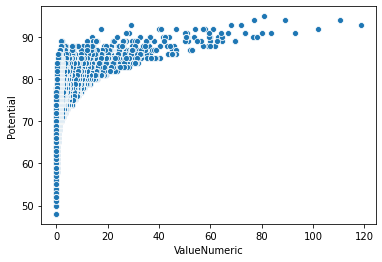

In [17]:
sns.scatterplot(data=fifa,x='ValueNumeric',y='Potential');

In [ ]:
# Se puede observar que hay una relación creciente pero no es lineal al 100%